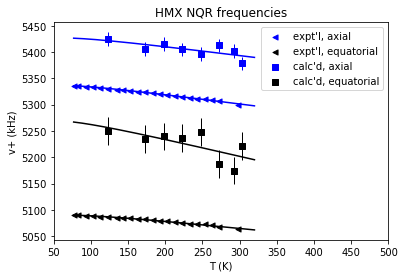

In [15]:
import matplotlib.pyplot as plt
import numpy as np


def lmap(func, li):
  return list(map(func, li))

f = open('hmx-data.txt','r').readlines()[2:]

# rip the temperatures from every other line
exptT                   = lmap(float, [ line.split()[0] for line in f ][::2])
# v+ for the two sites, axial is higher in frequency
expt_vplus_axial        = lmap(float, [ line.split()[1] for line in f ][0::2])
expt_vplus_equitorial   = lmap(float, [ line.split()[1] for line in f ][1::2])

# v- for the two sites respectively
expt_vminus_axial       = lmap(float, [ line.split()[2] for line in f ][0::2])
expt_vminus_equitorial  = lmap(float, [ line.split()[2] for line in f ][1::2])

# asymmetry parameter for the two sites
expt_eta_axial          = lmap(float, [ line.split()[3] for line in f ][0::2])
expt_eta_equitorial     = lmap(float, [ line.split()[3] for line in f ][1::2])

# coupling constants for the two sites
expt_cq_axial           = lmap(float, [ line.split()[4] for line in f ][0::2])
expt_cq_equitorial      = lmap(float, [ line.split()[4] for line in f ][1::2])


# GIPAW values here??
calcT                = [ 123,    173,    198,    223,    248,    273,    293,  303    ]

calc_cq_axial        = [ 6218.1,  6213.4,  6222.4,  6225.1,   6237.6,  6233.2, 0 ] # NEED THESE
calc_cq_equitorial   = [ 6076.9,  6081.4,  6083.6,  6095.1,   6088.1,  6104.2, 0  ] # NEED THESE

calc_eta_axial       = [.51103, .50995, .50811, .5076,   .50852,  .50189, .50603, 0   ]
calc_eta_equitorial  = [.47346, .47237, .47316, .47615,  .47132,  .47091, .46757, 0   ]

calc_vplus_axial     = [5424.66, 5405.50, 5415.06, 5404.99, 5396.33, 5412.55, 5402.31, 5378.33]
calc_vplus_equitorial= [5249.64, 5235.23, 5239.50, 5236.75, 5247.59, 5186.55, 5174.77, 5221.10]

def fitF(a,b,c,T):
  return a+b*T+c/T

def fitExpAxial(T):
  return fitF(5359.89, -.187026, -736.26, T)

def fitCalcAxial(T):
  return fitF(5449.70, -.179950, -736.20, T)

def fitExpEquit(T):
  return fitF(5111.39, -0.14666, -789.502, T)

def fitCalcEquit(T):
  return fitF(5306.01, -0.33600, -1013.63, T)

dom = np.linspace(77,320,150)
expr_fit_ax = [ fitExpAxial(item)  for item in dom ]
calc_fit_ax = [ fitCalcAxial(item) for item in dom ]
expr_fit_eq = [ fitExpEquit(item)  for item in dom ]
calc_fit_eq = [ fitCalcEquit(item) for item in dom ]

def main():

  #beta = unichr(0x3b2).encode('utf-8')
  beta = 'beta'
  title = "HMX NQR frequencies"
  plt.scatter( exptT[:-12], expt_vplus_axial[:-12],      marker='<', color='b', s=26, label='expt\'l, axial')
  plt.scatter( exptT[:-12], expt_vplus_equitorial[:-12], marker='<', color='k', s=26, label='expt\'l, equatorial')
  plt.scatter( calcT, calc_vplus_axial,                  marker="s", color='b', s=26, label='calc\'d, axial')
  plt.scatter( calcT, calc_vplus_equitorial,             marker="s", color='k', s=26, label='calc\'d, equatorial')
  plt.errorbar(calcT, calc_vplus_axial, yerr=np.std(calc_vplus_axial),color='b',linewidth=1, fmt='none')
  plt.errorbar(calcT, calc_vplus_equitorial, yerr=np.std(calc_vplus_equitorial), color='k', linewidth=1,fmt='none')
  plt.plot(dom, expr_fit_ax, color='b')
  plt.plot(dom, calc_fit_ax, color='b')
  plt.plot(dom, expr_fit_eq, color='k')
  plt.plot(dom, calc_fit_eq, color='k')
  plt.title(title)
  plt.xlabel("T (K)")
  plt.ylabel("v+ (kHz)")
  plt.xlim( (50, 500))
  plt.legend(loc=1)
  plt.savefig('hmx.pdf', format='pdf')
  plt.show()

if __name__ == '__main__':
  main()

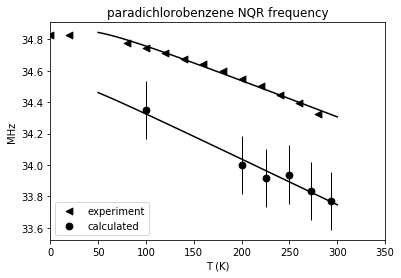

In [16]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np


exptT=[
280,
260,
240,
220,
200,
180,
160,
140,
120,
100,
80,
20,
0]

exptFq=[
34.327,
34.392,
34.447,
34.502,
34.550,
34.597,
34.640,
34.677,
34.713,
34.745,
34.775,
34.824,
34.829]

exptFit=[
34.35216871,
34.3984564,
34.44460196,
34.49056662,
34.53629613,
34.58171208,
34.62669691,
34.67106584,
34.71451092,
34.75647785,
34.795858,
34.82087468
]

calcT=[
293,
273,
250,
225,
200,
100]

calcFq=[
33.77153,
33.83568,
33.93888,
33.91430,
34.00137,
34.34826]

calcFit=[
33.76681024,
33.82502047,
33.89191277,
33.96454364,
34.03706338,
34.32436412]

def fitF(a,b,c,T):
  return a+b*T+c/T

def fitExp(T):
  return fitF(35.0232215, -0.002357, -3.1041262, T)

def fitCalc(T):
  return fitF(34.6266672, -0.002923, -1.0001559, T)

dom = np.linspace(50,300,100)
expr_fit       = [ fitExp(item) for item in dom ]
calc_fit       = [ fitCalc(item) for item in dom]

plt.scatter(exptT, exptFq, marker='<', s=46, color='k', label='experiment')
#plt.plot(exptT[:-1], exptFit)
plt.plot(dom, expr_fit, color='k')
plt.scatter(calcT, calcFq, marker='o', s=46,color='k', label='calculated')
plt.errorbar(calcT, calcFq, yerr=np.std(calcFq), linewidth=1,color='k', fmt='none')
plt.xlim(0,350)
#plt.plot(calcT,calcFit)
plt.plot(dom, calc_fit, color='k')

plt.legend(loc=3)

plt.title("paradichlorobenzene NQR frequency")
plt.xlabel("T (K)")
plt.ylabel('MHz')
plt.savefig('pcl2p.pdf', format='pdf')

plt.show()

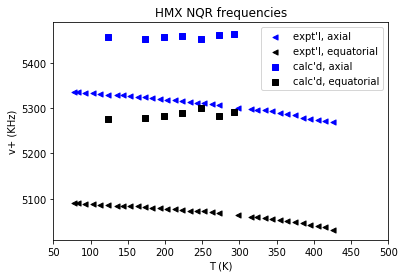

In [14]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt


def lmap(func, li):
  return list(map(func, li))

f = open('hmx-data.txt','r').readlines()[2:]

# rip the temperatures from every other line
exptT	  		= lmap(float, [ line.split()[0] for line in f ][::2])
# v+ for the two sites, axial is higher in frequency
expt_vplus_axial    	= lmap(float, [ line.split()[1] for line in f ][0::2])
expt_vplus_equitorial   = lmap(float, [ line.split()[1] for line in f ][1::2])

# v- for the two sites respectively
expt_vminus_axial  	= lmap(float, [ line.split()[2] for line in f ][0::2])
expt_vminus_equitorial  = lmap(float, [ line.split()[2] for line in f ][1::2])

# asymmetry parameter for the two sites
expt_eta_axial      	= lmap(float, [ line.split()[3] for line in f ][0::2])
expt_eta_equitorial     = lmap(float, [ line.split()[3] for line in f ][1::2])

# coupling constants for the two sites
expt_cq_axial       	= lmap(float, [ line.split()[4] for line in f ][0::2])
expt_cq_equitorial      = lmap(float, [ line.split()[4] for line in f ][1::2])


# GIPAW values here??
calcT	             = [ 123,    173,    198,    223,    248,    273,    293,      ]

calc_cq_axial        = [ 6218.1, 6213.4, 6222.4, 6225.1,  6237.6, 6233.2  ] # NEED THESE
calc_cq_equitorial   = [ 6076.9, 6081.4, 6083.6, 6095.1,  6088.1, 6104.2  ] # NEED THESE

calc_eta_axial       = [.51103, .50995, .50811, .5076,   .50852,  .50189, .50603   ]
calc_eta_equitorial  = [.47346, .47237, .47316, .47615,  .47132,  .47091, .46757   ]

calc_vplus_axial     = [5457.9, 5452.2, 5457.2, 5458.8,  5453.4,  5460.8, 5463.5   ] 
calc_vplus_equitorial= [5276.9, 5279.2, 5282.3, 5290.0,  5300.5,  5282.8, 5291.7   ]

def main():
  
  #beta = unichr(0x3b2).encode('utf-8')
  beta = 'beta'
  title = "HMX NQR frequencies"
  plt.scatter(exptT, expt_vplus_axial,      marker='<', color='b', s=26, label='expt\'l, axial')
  plt.scatter(exptT, expt_vplus_equitorial, marker='<', color='k', s=26, label='expt\'l, equatorial')
  plt.scatter(calcT, calc_vplus_axial,      marker="s", color='b', s=26, label='calc\'d, axial') 
  plt.scatter(calcT, calc_vplus_equitorial, marker="s", color='k', s=26, label='calc\'d, equatorial') 

  plt.title(title)
  plt.legend(loc=1)
  plt.xlabel("T (K)")
  plt.xlim(50,500)
  plt.ylabel("v+ (KHz)")
  plt.savefig('hmx_volume_dependence.pdf', format='pdf')
  plt.show()

if __name__ == '__main__':
  main()